# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [110]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
import pandas as pd
import numpy as np

csv_file='data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'

df=pd.read_csv(csv_file)


#convert data_values to integer, then divide by 10, because it is stored in tenths of degrees C
df['Data_Value']=df['Data_Value'].apply(lambda x: float(x)/10)
df['Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Day'] !='02-29']

#the following dataframe contains temp data until 2014-12-031, aggregated the min and max values by day
temp = df[ df['Date']<'2015-01-01' ].sort('Date')
temp = temp.groupby('Day')['Data_Value'].agg({'MAX':np.max, 'MIN':np.min})

#find the record high and record low temperatures in 2015
temp2 = df[ df['Date']>='2015-01-01' ].sort('Date')
temp2 = temp2.groupby('Day')['Data_Value'].agg({'MAX2015':np.max, 'MIN2015':np.min})
all_temp = pd.merge(temp, temp2, left_index=True, right_index=True, how='inner')

#add dates:
dates=pd.date_range('01-01-2015', periods=365, freq='1D')
all_temp['Date'] = dates
all_temp = all_temp.set_index('Date')


record_high = all_temp[all_temp['MAX2015']>all_temp['MAX']].loc[:, 'MAX2015']
record_low = all_temp[all_temp['MIN2015']<all_temp['MIN']].loc[:, 'MIN2015']


record_high


FileNotFoundError: File b'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv' does not exist

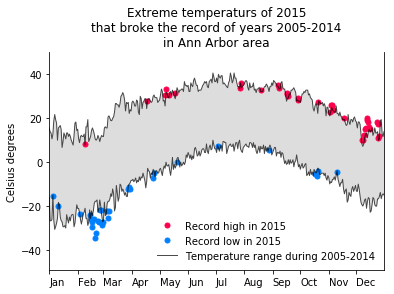

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

#display data
plt.plot(record_high, marker='o', color = "#FF004D", markersize = 5, linestyle="None", label = 'Record high in 2015')
plt.plot(record_low, marker='o', color='#0080FF', markersize= 5, linestyle='None', label = "Record low in 2015")
plt.plot(dates, temp['MIN'], c="black", linewidth=1, alpha = 0.7, label = 'Temperature range during 2005-2014')
plt.legend(loc = 0, frameon=False)
plt.plot(dates, temp['MAX'], c='black', linewidth=1, alpha= 0.7)

#adjustmentst - to make chart beautiful
plt.title('Extreme temperaturs of 2015\nthat broke the record of years 2005-2014\nin Ann Arbor area')
ax = plt.gca()
ax.axis(['01-01-2015', '12-31-2015', -49, 50])
ax.fill_between(dates, temp['MAX'], temp['MIN'], facecolor = '#DDDDDD')
plt.tick_params(top='off', right='off')
ax.spines['top'].set_color('none')
plt.ylabel("Celsius degrees")

#set ticklabels
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(m, ha ='left')

plt.show()


In [113]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)
ax = fig.add_subplot(111)

#display data
ax.plot(record_high, marker='o', color = "#FF004D", markersize = 5, linestyle="None", label = 'Record high in 2015')
ax.plot(record_low, marker='o', color='#0080FF', markersize= 5, linestyle='None', label = "Record low in 2015")
ax.plot(dates, temp['MIN'], c="black", linewidth=1, alpha = 0.7, label = 'Temperature range during 2005-2014')
ax.legend(loc = 0, frameon=False)
ax.plot(dates, temp['MAX'], c='black', linewidth=1, alpha= 0.7)

#adjustmentst - to make chart beautiful
ax.set_title(label='Extreme temperaturs of 2015\nthat broke the record of years 2005-2014\nin Ann Arbor area')
ax.axis(['01-01-2015', '12-31-2015', -49, 50])
ax.fill_between(dates, temp['MAX'], temp['MIN'], facecolor = '#DDDDDD')
ax.tick_params(top='off', right='off')
ax.spines['top'].set_color('none')

#set ticklabels
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(m, ha ='left')


canvas.print_png('assignment_2.png')


In [114]:
%%html
<img src='assignment_2.png' />

In [115]:
import datetime as dt

m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# This is the vital step. It will create a list of day numbers corresponding to middle of each month i.e. 15(Jan), 46(Feb), ... 
ticks = [(dt.date(2017,m,1)-dt.date(2016,12,15)).days for m in range(1,13)]
# It is important to use a non-leap year for this calculation (I used 2017).
# Also, I used (2016,12,15) to substract so that I get middle of each month rather than beginning, it just looks better that way.

#ax.set_xticks(ticks)
#ax.set_xticklabels(m)
ticks

[17, 48, 76, 107, 137, 168, 198, 229, 260, 290, 321, 351]